In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## DATA PREPARATION

In [3]:
train_df = pd.read_csv(r'C:\Users\PRACHI\Downloads\ML\train_indessa.csv')
test_df = pd.read_csv(r'C:\Users\PRACHI\Downloads\ML\test_indessa.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_df.shape

(532428, 45)

In [6]:
test_df.shape

(354951, 44)

In [7]:
train_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [8]:
test_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


# DATA PREPROCESSING

### AMENDING THE CATEGORICAL COLUMNS

In [9]:
train_df['last_week_pay'].unique()

array(['26th week', '9th week', '135th week', '96th week', '113th week',
       '117th week', '78th week', '44th week', '52th week', '95th week',
       '48th week', '82th week', '35th week', '104th week', '17th week',
       '13th week', 'NAth week', '31th week', '30th week', '70th week',
       '4th week', '91th week', '65th week', '39th week', '83th week',
       '74th week', '22th week', '61th week', '156th week', '122th week',
       '174th week', '87th week', '139th week', '0th week', '57th week',
       '131th week', '152th week', '43th week', '161th week', '56th week',
       '170th week', '157th week', '109th week', '126th week',
       '100th week', '148th week', '265th week', '165th week',
       '261th week', '213th week', '222th week', '196th week',
       '130th week', '144th week', '244th week', '204th week',
       '69th week', '217th week', '143th week', '191th week', '21th week',
       '226th week', '18th week', '108th week', '79th week', '183th week',
       '178th 

In [10]:
#amending the last_week_pay column
train_df['last_week_pay'].replace(to_replace = 'th week', value = '', regex = True, inplace = True)
test_df['last_week_pay'].replace(to_replace = 'th week', value = '', regex = True, inplace = True)

train_df['last_week_pay'] = pd.to_numeric(train_df['last_week_pay'], errors = 'coerce')
test_df['last_week_pay'] = pd.to_numeric(test_df['last_week_pay'], errors = 'coerce')

In [11]:
train_df['last_week_pay'].unique()

array([ 26.,   9., 135.,  96., 113., 117.,  78.,  44.,  52.,  95.,  48.,
        82.,  35., 104.,  17.,  13.,  nan,  31.,  30.,  70.,   4.,  91.,
        65.,  39.,  83.,  74.,  22.,  61., 156., 122., 174.,  87., 139.,
         0.,  57., 131., 152.,  43., 161.,  56., 170., 157., 109., 126.,
       100., 148., 265., 165., 261., 213., 222., 196., 130., 144., 244.,
       204.,  69., 217., 143., 191.,  21., 226.,  18., 108.,  79., 183.,
       178., 187., 252., 200., 118.,  92., 121., 209., 239., 248., 169.,
       153., 235., 256.,   8., 182., 230., 231., 257., 243., 205., 192.,
       270., 218., 283., 300., 221., 291., 278., 274., 269., 304.])

In [12]:
#last_week_pay column contain null values, thus filling them with 0.
train_df['last_week_pay'].fillna(0, inplace = True)
test_df['last_week_pay'].fillna(0, inplace = True)

In [13]:
train_df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [14]:
#amending the term column
train_df['term'].replace(to_replace = 'months', value = '', regex = True, inplace = True)
test_df['term'].replace(to_replace = 'months', value = '', regex = True, inplace = True)

train_df['term'] = pd.to_numeric(train_df['term'], errors = 'coerce')
test_df['term'] = pd.to_numeric(test_df['term'], errors = 'coerce')

In [15]:
train_df['term'].unique()

array([36, 60], dtype=int64)

In [16]:
train_df['home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [17]:
#converting them into 2 columns
train_df['rented_home'] = train_df['home_ownership'].apply(lambda x : 1 if ((x == 'MORTGAGE') | (x == 'RENT') ) else 0)
train_df['own_home'] = train_df['home_ownership'].apply(lambda x : 1 if (x == 'OWN') else 0) 
train_df.drop(['home_ownership'], axis =1 , inplace = True)

test_df['own_home'] = test_df['home_ownership'].apply(lambda x : 1 if (x == 'OWN') else 0) 
test_df['rented_home'] = test_df['home_ownership'].apply(lambda x : 1 if ((x == 'MORTGAGE') | (x == 'RENT') ) else 0)
test_df.drop(['home_ownership'], axis =1 , inplace = True)

In [18]:
train_df['emp_length'].unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '8 years', '7 years', '4 years', nan, '1 year', '3 years',
       '6 years'], dtype=object)

In [19]:
#amending the emp_length column
train_df['emp_length'].replace(to_replace = 'years', value = '', regex = True, inplace = True)
train_df['emp_length'].replace(to_replace = '< 1 year', value = '1', regex = True, inplace = True)
train_df['emp_length'].replace(to_replace = '\+', value = '', regex = True, inplace = True)
train_df['emp_length'].replace(to_replace = '1 year' , value = '1', regex = True, inplace = True)
train_df['emp_length'] = pd.to_numeric(train_df['emp_length'], errors = 'coerce')

test_df['emp_length'].replace(to_replace = 'years', value = '', regex = True, inplace = True)
test_df['emp_length'].replace(to_replace = '< 1 year', value = '1', regex = True, inplace = True)
test_df['emp_length'].replace(to_replace = '\+' , value = '', regex = True, inplace = True)
test_df['emp_length'].replace(to_replace = '1 year' , value = '1', regex = True, inplace = True)
test_df['emp_length'] = pd.to_numeric(test_df['emp_length'], errors = 'coerce')

In [20]:
train_df['emp_length'].unique()

array([ 9.,  1.,  2., 10.,  5.,  8.,  7.,  4., nan,  3.,  6.])

In [21]:
#since, emp_length contains nan values, converting them to 0.
train_df['emp_length'].fillna(0, inplace = True)
test_df['emp_length'].fillna(0, inplace = True)

In [22]:
train_df['emp_length'].unique()

array([ 9.,  1.,  2., 10.,  5.,  8.,  7.,  4.,  0.,  3.,  6.])

In [23]:
#since, zip code and add_state denote the same thing we can drop either of them.
#let's drop addr_state and amend zip_code column

In [24]:
train_df.drop(['addr_state'], axis = 1, inplace = True)
train_df['zip_code'].replace(to_replace = 'xx', value = '', regex = True, inplace = True)
train_df['zip_code'] = pd.to_numeric(train_df['zip_code'], errors = 'coerce')

test_df.drop(['addr_state'], axis = 1, inplace = True)
test_df['zip_code'].replace(to_replace = 'xx', value = '', regex = True, inplace = True)
test_df['zip_code'] = pd.to_numeric(test_df['zip_code'], errors = 'coerce')

### DEALING WITH MISSING VALUES.

In [25]:
missing_pc = train_df.isnull().mean()
missing_pc

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
batch_enrolled                 0.159926
int_rate                       0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057910
emp_length                     0.000000
annual_inc                     0.000006
verification_status            0.000000
pymnt_plan                     0.000000
desc                           0.858011
purpose                        0.000000
title                          0.000169
zip_code                       0.000000
dti                            0.000000
delinq_2yrs                    0.000030
inq_last_6mths                 0.000030
mths_since_last_delinq         0.511908
mths_since_last_record         0.845758
open_acc                       0.000030
pub_rec                        0.000030


DROPPING THE COLUMNS HAVING HIGH NULL VALUES SINCE THEY'LL NOT BE A SIGNIFICANT FACTOR WHILE DECIDING THE TARGET

In [26]:
over_threshold_cols = missing_pc[missing_pc >= 0.40]
over_threshold_cols

desc                           0.858011
mths_since_last_delinq         0.511908
mths_since_last_record         0.845758
mths_since_last_major_derog    0.750239
verification_status_joint      0.999427
dtype: float64

In [27]:
train_df.drop(over_threshold_cols.index, axis = 1, inplace = True)
test_df.drop(over_threshold_cols.index, axis = 1, inplace = True)

In [28]:
missing_pc2 = train_df.isnull().mean()
nul_cols = missing_pc2[missing_pc2 != 0]
nul_cols

batch_enrolled                0.159926
emp_title                     0.057910
annual_inc                    0.000006
title                         0.000169
delinq_2yrs                   0.000030
inq_last_6mths                0.000030
open_acc                      0.000030
pub_rec                       0.000030
revol_util                    0.000539
total_acc                     0.000030
collections_12_mths_ex_med    0.000178
acc_now_delinq                0.000030
tot_coll_amt                  0.078891
tot_cur_bal                   0.078891
total_rev_hi_lim              0.078891
dtype: float64

In [29]:
cat_cols = train_df.select_dtypes(include = ['object']).columns
cat_cols

Index(['batch_enrolled', 'grade', 'sub_grade', 'emp_title',
       'verification_status', 'pymnt_plan', 'purpose', 'title',
       'initial_list_status', 'application_type'],
      dtype='object')

In [30]:
num_cols = train_df.select_dtypes(exclude = ['object']).drop(['loan_status'], axis = 1).columns
num_cols

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'emp_length', 'annual_inc', 'zip_code', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'rented_home', 'own_home'],
      dtype='object')

### IMPUTING MISSING NUMERICAL VALUES WITH MEDIAN or 0.

In [31]:
for i in num_cols :
    train_df[i].fillna(0, inplace = True)

In [32]:
for i in num_cols :
    test_df[i].fillna(0, inplace = True)

### SUBSTITUTING MISSING CATEGORICAL VALUES.

In [33]:
train_df['batch_enrolled'].mode()[0]

' '

In [34]:
#since, the most frequent value for batch_enrolled column is null, we can simply drop this column.

In [35]:
train_df.drop(['batch_enrolled'], axis = 1, inplace = True)
test_df.drop(['batch_enrolled'], axis = 1, inplace = True)

##### let's check emp_title column

In [36]:
train_df['emp_title'].mode()[0]

'Teacher'

In [37]:
train_df['emp_title'].unique()

array(['clerk', 'Human Resources Specialist', 'Driver', ...,
       'Staffing assistant', 'Champion Mortgage', 'Health Care Analyst'],
      dtype=object)

In [38]:
#here, ..... clearly implies that this column contains various type of titles. Thus, we can simply drop off this column or can take topmost 10 professions.
#let's take topmost 10 professions and perform label encoding.

##### LABEL ENCODING OF TOP 10 EMPLOYEE TITLES. (TRAIN DATASET)

In [39]:
df_new_train = pd.DataFrame(train_df, columns = {'emp_title'})
emp_title_group = train_df.groupby('emp_title')['emp_title'].count()
emp_title_sorted = emp_title_group.sort_values(ascending = False) 

In [40]:
emp_title_top_10 = emp_title_sorted[0:10]
emp_title_top_10 = df_new_train['emp_title'].value_counts().sort_values(ascending = False).head(10).index
emp_title_top_10 = list(emp_title_top_10)


In [41]:
for categories in emp_title_top_10:
    df_new_train[categories] = np.where(df_new_train['emp_title'] == categories,1,0)
df_new_train1 = df_new_train.add_suffix('_title')
df_new_train1.head()

,emp_title_title,Teacher_title,Manager_title,Registered Nurse_title,Owner_title,RN_title,Supervisor_title,Sales_title,Project Manager_title,Office Manager_title,Driver_title
0,clerk,0,0,0,0,0,0,0,0,0,0
1,Human Resources Specialist,0,0,0,0,0,0,0,0,0,0
2,Driver,0,0,0,0,0,0,0,0,0,1
3,Us office of Personnel Management,0,0,0,0,0,0,0,0,0,0
4,LAUSD-HOLLYWOOD HIGH SCHOOL,0,0,0,0,0,0,0,0,0,0


In [42]:
df_new_train1.drop(['emp_title_title'], axis = 1, inplace = True)

In [43]:
train_df_1 = pd.concat([train_df, df_new_train1], axis = 1)

In [44]:
train_df_1.drop(['emp_title'], axis =1 , inplace = True)

##### LABEL ENCODING OF TOP 10 EMPLOYEE TITLES. (TRAIN DATASET)

In [45]:
df_new_test = pd.DataFrame(test_df, columns = {'emp_title'})
emp_title_group = test_df.groupby('emp_title')['emp_title'].count()
emp_title_sorted = emp_title_group.sort_values(ascending = False) 
emp_title_sorted

emp_title
Teacher                                    5527
Manager                                    4716
Registered Nurse                           2304
RN                                         2236
Owner                                      2207
                                           ... 
Rosewood hotels and resorts                   1
Rosina Food Products                          1
Rosman Adjustment Corp                        1
Ross                                          1
 Appellate Chief, Assistant US Attorney       1
Name: emp_title, Length: 135102, dtype: int64

In [46]:
emp_title_top_10 = emp_title_sorted[0:10]
emp_title_top_10 = df_new_test['emp_title'].value_counts().sort_values(ascending = False).head(10).index
emp_title_top_10 = list(emp_title_top_10)
emp_title_top_10

['Teacher',
 'Manager',
 'Registered Nurse',
 'RN',
 'Owner',
 'Supervisor',
 'Sales',
 'Project Manager',
 'Driver',
 'Office Manager']

In [47]:
for categories in emp_title_top_10:
    df_new_test[categories] = np.where(df_new_test['emp_title'] == categories,1,0)
df_new_test1 = df_new_test.add_suffix('_title')
df_new_test1.head()

,emp_title_title,Teacher_title,Manager_title,Registered Nurse_title,RN_title,Owner_title,Supervisor_title,Sales_title,Project Manager_title,Driver_title,Office Manager_title
0,Data Analyst,0,0,0,0,0,0,0,0,0,0
1,Senior Database Administrator,0,0,0,0,0,0,0,0,0,0
2,Customer service representative,0,0,0,0,0,0,0,0,0,0
3,ACCT OFFICER,0,0,0,0,0,0,0,0,0,0
4,Paralegal,0,0,0,0,0,0,0,0,0,0


In [48]:
df_new_test1.drop(['emp_title_title'], axis = 1, inplace = True)

In [49]:
test_df_1 = pd.concat([test_df, df_new_test1], axis = 1)

In [50]:
test_df_1.drop(['emp_title'], axis =1 , inplace = True)

##### let's check title column

In [51]:
train_df['title'].mode()[0]

'Debt consolidation'

In [52]:
train_df['title'].unique()

array(['Debt consolidation', 'Home improvement', 'refi', ...,
       'Relieve Stress', 'Great Credit', 'Loan for Deck'], dtype=object)

In [53]:
#here, ..... clearly implies that this column contains various type of titles. Thus, we can simply drop off this column or can take topmost 10 professions.
#let's take topmost 10 professions and perform label encoding.

##### Let's take topmost 10 professions and perform label encoding.
##### LABEL ENCODING OF TOP 10 EMPLOYEE TITLES. (TRAIN DATASET)

In [54]:
df_new_train = pd.DataFrame(train_df_1, columns = {'title'})
title_group = train_df_1.groupby('title')['title'].count()
title_sorted = title_group.sort_values(ascending = False) 
title_sorted

title
Debt consolidation         248967
Credit card refinancing     98582
Home improvement            24057
Other                       19053
Debt Consolidation           9932
                            ...  
Papa                            1
PapaGrama                       1
PappaK                          1
Parachute                       1
zxcvb                           1
Name: title, Length: 39693, dtype: int64

In [55]:
title_top_10 = title_sorted[0:10]
title_top_10 = df_new_train['title'].value_counts().sort_values(ascending = False).head(10).index
title_top_10 = list(title_top_10)
title_top_10

['Debt consolidation',
 'Credit card refinancing',
 'Home improvement',
 'Other',
 'Debt Consolidation',
 'Major purchase',
 'Medical expenses',
 'Business',
 'Consolidation',
 'Car financing']

In [56]:
for categories in title_top_10:
    df_new_train[categories] = np.where(df_new_train['title'] == categories,1,0)
df_new_train2 = df_new_train.add_suffix('_title')
df_new_train2.head()

,title_title,Debt consolidation_title,Credit card refinancing_title,Home improvement_title,Other_title,Debt Consolidation_title,Major purchase_title,Medical expenses_title,Business_title,Consolidation_title,Car financing_title
0,Debt consolidation,1,0,0,0,0,0,0,0,0,0
1,Home improvement,0,0,1,0,0,0,0,0,0,0
2,Debt consolidation,1,0,0,0,0,0,0,0,0,0
3,Debt consolidation,1,0,0,0,0,0,0,0,0,0
4,refi,0,0,0,0,0,0,0,0,0,0


In [57]:
df_new_train2.drop(['title_title'], axis = 1, inplace = True)
train_df_2 = pd.concat([train_df_1, df_new_train2], axis = 1)
train_df_2.drop(['title'], axis =1 , inplace = True)

##### Let's take topmost 10 professions and perform label encoding.
##### LABEL ENCODING OF TOP 10 EMPLOYEE TITLES. (TEST DATASET)

In [58]:
df_new_test = pd.DataFrame(test_df_1, columns = {'title'})
title_group = test_df_1.groupby('title')['title'].count()
title_sorted = title_group.sort_values(ascending = False) 
title_sorted

title
Debt consolidation         165385
Credit card refinancing     65759
Home improvement            16113
Other                       12839
Debt Consolidation           6482
                            ...  
RECOVERY MODE                   1
RED TRUCK                       1
REDEMPTION                      1
REDO                            1
Misery Money                    1
Name: title, Length: 27975, dtype: int64

In [59]:
title_top_10 = title_sorted[0:10]
title_top_10 = df_new_test['title'].value_counts().sort_values(ascending = False).head(10).index
title_top_10 = list(title_top_10)
title_top_10

['Debt consolidation',
 'Credit card refinancing',
 'Home improvement',
 'Other',
 'Debt Consolidation',
 'Major purchase',
 'Business',
 'Medical expenses',
 'Consolidation',
 'Car financing']

In [60]:
for categories in title_top_10:
    df_new_test[categories] = np.where(df_new_test['title'] == categories,1,0)
df_new_test2 = df_new_test.add_suffix('_title')
df_new_test2.head()

,title_title,Debt consolidation_title,Credit card refinancing_title,Home improvement_title,Other_title,Debt Consolidation_title,Major purchase_title,Business_title,Medical expenses_title,Consolidation_title,Car financing_title
0,wrap it up,0,0,0,0,0,0,0,0,0,0
1,Major purchase,0,0,0,0,0,1,0,0,0,0
2,Debt consolidation,1,0,0,0,0,0,0,0,0,0
3,Debt consolidation,1,0,0,0,0,0,0,0,0,0
4,Major purchase,0,0,0,0,0,1,0,0,0,0


In [61]:
df_new_test2.drop(['title_title'], axis = 1, inplace = True)
test_df_2 = pd.concat([test_df_1, df_new_test2], axis = 1)
test_df_2.drop(['title'], axis =1 , inplace = True)

In [62]:
#finally, we get train_df_2 and test_df_2

In [63]:
train_df_2.isnull().mean()

member_id                        0.0
loan_amnt                        0.0
funded_amnt                      0.0
funded_amnt_inv                  0.0
term                             0.0
int_rate                         0.0
grade                            0.0
sub_grade                        0.0
emp_length                       0.0
annual_inc                       0.0
verification_status              0.0
pymnt_plan                       0.0
purpose                          0.0
zip_code                         0.0
dti                              0.0
delinq_2yrs                      0.0
inq_last_6mths                   0.0
open_acc                         0.0
pub_rec                          0.0
revol_bal                        0.0
revol_util                       0.0
total_acc                        0.0
initial_list_status              0.0
total_rec_int                    0.0
total_rec_late_fee               0.0
recoveries                       0.0
collection_recovery_fee          0.0
c

In [64]:
test_df_2.isnull().mean()

member_id                        0.0
loan_amnt                        0.0
funded_amnt                      0.0
funded_amnt_inv                  0.0
term                             0.0
int_rate                         0.0
grade                            0.0
sub_grade                        0.0
emp_length                       0.0
annual_inc                       0.0
verification_status              0.0
pymnt_plan                       0.0
purpose                          0.0
zip_code                         0.0
dti                              0.0
delinq_2yrs                      0.0
inq_last_6mths                   0.0
open_acc                         0.0
pub_rec                          0.0
revol_bal                        0.0
revol_util                       0.0
total_acc                        0.0
initial_list_status              0.0
total_rec_int                    0.0
total_rec_late_fee               0.0
recoveries                       0.0
collection_recovery_fee          0.0
c

## OUTLIER DETECTION

In [65]:
def remove_outliers(data, features):
    for c in features :
        Q1 = np.percentile(data[c],25)
        Q3 = np.percentile(data[c], 75)
        IQR = Q3-Q1
        data1 = data[(data[c]<Q3+1.5*IQR)&(data[c] > Q1 - 1.5*IQR)]
        return data1

In [66]:
train_df3 = remove_outliers(train_df_2 , num_cols)

In [67]:
test_df3 = test_df_2.copy()

In [68]:
train_df3.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,annual_inc,verification_status,pymnt_plan,purpose,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,rented_home,own_home,Teacher_title,Manager_title,Registered Nurse_title,Owner_title,RN_title,Supervisor_title,Sales_title,Project Manager_title,Office Manager_title,Driver_title,Debt consolidation_title,Credit card refinancing_title,Home improvement_title,Other_title,Debt Consolidation_title,Major purchase_title,Medical expenses_title,Business_title,Consolidation_title,Car financing_title
0,58189336,14350,14350,14350.0,36,19.19,E,E3,9.0,28700.0,Source Verified,n,debt_consolidation,349,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26.0,0.0,0.0,28699.0,30800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,70011223,4800,4800,4800.0,36,10.99,B,B4,1.0,65000.0,Source Verified,n,home_improvement,209,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,0.0,9974.0,32900.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,70255675,10000,10000,10000.0,36,7.26,A,A4,2.0,45000.0,Not Verified,n,debt_consolidation,447,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,65.0,38295.0,34900.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1893936,15000,15000,15000.0,36,19.72,D,D5,10.0,105000.0,Not Verified,n,debt_consolidation,221,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135.0,0.0,0.0,55564.0,24700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,7652106,16000,16000,16000.0,36,10.64,B,B2,10.0,52000.0,Verified,n,credit_card,900,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96.0,0.0,0.0,47159.0,47033.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
train_df3['sub_grade'].unique()

array(['E3', 'B4', 'A4', 'D5', 'B2', 'A5', 'B1', 'C4', 'D4', 'C3', 'D2',
       'A3', 'A1', 'C1', 'D1', 'E2', 'B3', 'A2', 'C2', 'C5', 'E4', 'D3',
       'B5', 'F2', 'F5', 'E1', 'E5', 'F4', 'F1', 'F3', 'G4', 'G3', 'G5',
       'G1', 'G2'], dtype=object)

In [70]:
train_df3['sub_grade'].replace(to_replace = 'A', value = '1', regex = True, inplace = True)
train_df3['sub_grade'].replace(to_replace = 'B', value = '2', regex = True, inplace = True)
train_df3['sub_grade'].replace(to_replace = 'C', value = '3', regex = True, inplace = True)
train_df3['sub_grade'].replace(to_replace = 'D', value = '4', regex = True, inplace = True)
train_df3['sub_grade'].replace(to_replace = 'E', value = '5', regex = True, inplace = True)
train_df3['sub_grade'].replace(to_replace = 'F', value = '6', regex = True, inplace = True)
train_df3['sub_grade'].replace(to_replace = 'G', value = '7', regex = True, inplace = True)
train_df3['sub_grade'] = pd.to_numeric(train_df3['sub_grade'], errors = 'coerce')

test_df3['sub_grade'].replace(to_replace = 'A', value = '1', regex = True, inplace = True)
test_df3['sub_grade'].replace(to_replace = 'B', value = '2', regex = True, inplace = True)
test_df3['sub_grade'].replace(to_replace = 'C', value = '3', regex = True, inplace = True)
test_df3['sub_grade'].replace(to_replace = 'D', value = '4', regex = True, inplace = True)
test_df3['sub_grade'].replace(to_replace = 'E', value = '5', regex = True, inplace = True)
test_df3['sub_grade'].replace(to_replace = 'F', value = '6', regex = True, inplace = True)
test_df3['sub_grade'].replace(to_replace = 'G', value = '7', regex = True, inplace = True)
test_df3['sub_grade'] = pd.to_numeric(test_df3['sub_grade'], errors = 'coerce')

In [71]:
train_df3['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [72]:
train_df3['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [73]:
train_df3['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'major_purchase', 'small_business', 'vacation', 'car', 'moving',
       'medical', 'wedding', 'renewable_energy', 'house', 'educational'],
      dtype=object)

In [74]:
train_df3['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [75]:
train_df3['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

## LET'S DO ENCODING

In [76]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

In [77]:
#we can use LabelEncoder for verification_status, pymnt_plan, initial_list_status, application_type, grade

In [78]:
label_encoders = {}
categorical_columns = ['verification_status', 'pymnt_plan', 'initial_list_status', 'application_type' , 'grade']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    train_df3[column] = label_encoders[column].fit_transform(train_df3[column])

In [79]:
label_encoders = {}
categorical_columns = ['verification_status', 'pymnt_plan', 'initial_list_status', 'application_type' , 'grade']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    test_df3[column] = label_encoders[column].fit_transform(test_df3[column])

In [80]:
one_hot_cols = ["purpose"]
for col in one_hot_cols:
    train_df3 = pd.concat(
        [train_df3, pd.get_dummies(train_df3[col], prefix=col)], 
        axis=1, 
        join="inner",
    )
train_df3 = train_df3.drop(one_hot_cols, axis=1)

In [81]:
one_hot_cols = ["purpose"]
for col in one_hot_cols:
    test_df3 = pd.concat(
        [test_df3, pd.get_dummies(test_df3[col], prefix=col)], 
        axis=1, 
        join="inner",
    )
test_df3 = test_df3.drop(one_hot_cols, axis=1)

In [82]:
train_df4 = train_df3.drop(['loan_status'], axis = 1)

In [83]:
scaler = StandardScaler()
train_df4.loc[:] = scaler.fit_transform(train_df4)

In [84]:
test_df3.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,annual_inc,verification_status,pymnt_plan,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,own_home,rented_home,Teacher_title,Manager_title,Registered Nurse_title,RN_title,Owner_title,Supervisor_title,Sales_title,Project Manager_title,Driver_title,Office Manager_title,Debt consolidation_title,Credit card refinancing_title,Home improvement_title,Other_title,Debt Consolidation_title,Major purchase_title,Business_title,Medical expenses_title,Consolidation_title,Car financing_title,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,11937648,14000,14000,14000.0,60,16.24,2,35,4.0,73500.0,1,0,450,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,0,3915.61,0.0,0.0,0.0,0.0,0,104.0,0.0,0.0,85230.0,45700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,38983318,16000,16000,16000.0,60,9.49,1,22,5.0,105000.0,1,0,275,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,1,1495.06,0.0,0.0,0.0,0.0,0,57.0,0.0,0.0,444991.0,21400.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,27999917,11050,11050,11050.0,60,15.61,3,41,10.0,62300.0,0,0,672,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,1,2096.21,0.0,0.0,0.0,0.0,0,70.0,0.0,0.0,105737.0,16300.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,61514932,35000,35000,34700.0,60,12.69,2,32,10.0,150000.0,1,0,961,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,0,1756.31,0.0,0.0,0.0,0.0,0,22.0,0.0,0.0,287022.0,72400.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,59622821,6500,6500,6500.0,36,6.89,0,13,5.0,52000.0,0,0,707,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,1,172.21,0.0,0.0,0.0,0.0,0,22.0,0.0,0.0,234278.0,26700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
scaler = StandardScaler()
test_df3.loc[:] = scaler.fit_transform(test_df3)

## LET'S PERFORM THE MODELLING

In [86]:
X_train = train_df4
Y_train = train_df3['loan_status']
X_test = test_df3

<AxesSubplot:xlabel='loan_status', ylabel='count'>

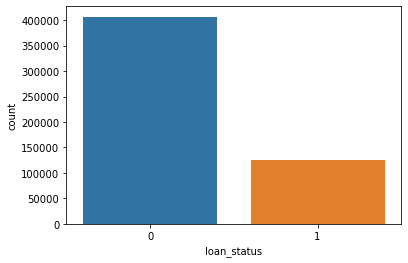

In [87]:
sns.countplot(Y_train)

In [88]:
#dataset is highly imbalanced.

In [89]:
seed =7

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X_train,Y_train,random_state=seed)

In [91]:
#pip install xgboost

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [93]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
# models.append(("svc",SVC()))
# models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))
models.append(("rfc",RandomForestClassifier()))
models.append(("ac",AdaBoostClassifier()))
models.append(("xgb",XGBClassifier()))
models.append(("mlp",MLPClassifier()))

In [94]:
scoring='accuracy'

In [95]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [96]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits= 2, random_state = seed, shuffle = True)
    cv_result=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.875617 0.000483
tree 0.905195 0.000648
lda 0.849968 0.001140
nb 0.333399 0.001801
rfc 0.915170 0.000116
ac 0.893869 0.000734
[19:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb 0.938360 0.000873
mlp 0.930475 0.000430


In [97]:
#thus we see that RandomForestClassifier works the best. Since, it's cv mean is high and cv std is low. 

In [98]:
#We're interested in lowering down the FP as much as we can.

In [99]:
#Let's evaluate 3 models viz, RFC, XGBoost & MLP.

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [101]:
svc=XGBClassifier()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(100*(accuracy_score(y_test,pred)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[19:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
93.90715739968597
[[97535  4186]
 [ 3924 27462]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    101721
           1       0.87      0.87      0.87     31386

    accuracy                           0.94    133107
   macro avg       0.91      0.92      0.92    133107
weighted avg       0.94      0.94      0.94    133107



In [102]:
svc=RandomForestClassifier()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(100*(accuracy_score(y_test,pred)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

91.83814525156453
[[99188  2533]
 [ 8331 23055]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    101721
           1       0.90      0.73      0.81     31386

    accuracy                           0.92    133107
   macro avg       0.91      0.85      0.88    133107
weighted avg       0.92      0.92      0.92    133107



In [103]:
svc=MLPClassifier()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(100*(accuracy_score(y_test,pred)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

93.23025836357216
[[96769  4952]
 [ 4059 27327]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    101721
           1       0.85      0.87      0.86     31386

    accuracy                           0.93    133107
   macro avg       0.90      0.91      0.91    133107
weighted avg       0.93      0.93      0.93    133107



In [104]:
# Thus, XGB has higher accuracy & f1 score. Thus, we'll stick to RFC.

In [105]:
rf1 = XGBClassifier()
rf1.fit(X_train, Y_train)
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf1 = pd.DataFrame(y_pred_rf1, columns = {'Predicted'})

### Since, the dataset is imbalanced, let's use SMOTE.

In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
smote = SMOTE()
X_tf,y_tf = smote.fit_resample(X_train,Y_train)
X_tf.shape, y_tf.shape

((813202, 69), (813202,))

In [108]:
from sklearn.preprocessing import RobustScaler

In [110]:
scaler = RobustScaler()
X_tf = scaler.fit_transform(X_tf)

# Split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(X_tf,y_tf, random_state = 3300)

print(x_train.shape[0], x_test.shape[0])

609901 203301


In [111]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits= 2, random_state = seed, shuffle = True)
    cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.841784 0.000397
tree 0.931507 0.000144
lda 0.812737 0.000124
nb 0.560063 0.007837
rfc 0.947546 0.000161
ac 0.885204 0.000675
[20:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb 0.958797 0.000138
mlp 0.938918 0.000607


In [118]:
svc=RandomForestClassifier()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(100*(accuracy_score(y_test,pred)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

95.42697773252468
[[97503  4016]
 [ 5281 96501]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95    101519
           1       0.96      0.95      0.95    101782

    accuracy                           0.95    203301
   macro avg       0.95      0.95      0.95    203301
weighted avg       0.95      0.95      0.95    203301



In [121]:
#thus, using SMOTE the accuracy increases.

In [119]:
rf1 = RandomForestClassifier()
rf1.fit(X_train, Y_train)
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf1 = pd.DataFrame(y_pred_rf1, columns = {'Predicted'})

In [120]:
y_pred_rf1

,Predicted
0,0
1,0
2,0
3,0
4,0
...,...
354946,0
354947,0
354948,1
354949,0


## SUBMISSION

In [126]:
df_output=pd.DataFrame()

In [130]:
a = test_df_2['member_id'].reset_index()
df_output['member_id'] = a['member_id']

In [131]:
df_output

,member_id
0,11937648
1,38983318
2,27999917
3,61514932
4,59622821
...,...
354946,19145105
354947,46304777
354948,903745
354949,53032475


In [133]:
df_output['loan_status'] = y_pred_rf1

In [134]:
df_output

,member_id,loan_status
0,11937648,0
1,38983318,0
2,27999917,0
3,61514932,0
4,59622821,0
...,...,...
354946,19145105,0
354947,46304777,0
354948,903745,1
354949,53032475,0


In [ ]:
# df_output[['member_id','loan_status']].to_csv(r'C:\Users\PRACHI\Downloads\ML\submission1.csv',index=False)